# Regression with interaction effects - continuous variables

In <a href="regression_interaction_en.html">another post</a> we talked about regression analysis with interaction effects. The variables then only had two values. But how do we do when one or both of the variables in the interaction are continuous, with many values? In general we do the same thing, but we have to present and interpret the results in a slightly different way. That is the subject of this post. Anyone that wants to dig deeper can read <a href="https://www.jstor.org/stable/25791835?seq=1#page_scan_tab_contents" target=_blank>this (paywalled) article</a>.

We will use data from the American <a href="http://gss.norc.org/get-the-data/stata">General Social Survey</a>, a survey with regular citizens, with questions about a lot of subjects. We will use the 2016 version, and ask what is the effect of having kids on income. If you want to follow along, download the data and put it into your project folder. I have put it in a sub-folder called "data", which I also state when loading the file.

In the code below, we first load the data, and then do a recoding to create a "woman" variable.

In [2]:
cd "/Users/xsunde/Dropbox/Jupyter/stathelp"
use "data/GSS2016.dta", clear
recode sex (1=0) (2=1), generate(woman)


/Users/xsunde/Dropbox/Jupyter/stathelp


(2867 differences between sex and woman)


## Interaction analysis with continuous variables

In the <a href="regression_interaction_en.html">previous post</a> we could see that the effect of having kids on income was different for men and women. But the variable we used for kids was a dummy variable, with the values 0 (no kids) and 1 (one or more kids). Now we will insteade use a continous variable, "childs", that shows how many kids the respondent has. The variable is however cut off at 8 - the value 8 signifies 8 or more kids.

First we do a normal regression, with income as the dependent variable, and "woman" and "childs" as independents, and also contorlling for age, since it is strongly related to both income and the number of kids.

In [3]:
reg realrinc woman childs age 


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(3, 1623)      =     24.96
       Model |  6.1202e+10         3  2.0401e+10   Prob > F        =    0.0000
    Residual |  1.3264e+12     1,623   817265487   R-squared       =    0.0441
-------------+----------------------------------   Adj R-squared   =    0.0423
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28588

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       woman |   -9474.27   1418.312    -6.68   0.000    -12256.19   -6692.354
      childs |  -108.2144   502.1071    -0.22   0.829    -1093.061    876.6319
         age |   282.4416   52.96583     5.33   0.000      178.553    386.3302
       _cons |   16147.79   2435.659     6.63   0.

The coefficient for "childs" shows the expected effect of increasing the variable one step, which means having another child. It is weakly negative and insignificant. There is thus no apparent difference between respondents with few and many children. The effect of woman is negative - women earn less than men.

## Difference in the effect of having children for women and men

Now we will add the interaction between woman and childs. We can do that directly in the regression command, by connecting the two variables with `##`. But we must also add `c.` in front on the childs variable, to show that it is continuous.

In [4]:
reg realrinc woman##c.childs age


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(4, 1622)      =     19.93
       Model |  6.5005e+10         4  1.6251e+10   Prob > F        =    0.0000
    Residual |  1.3226e+12     1,622   815424344   R-squared       =    0.0468
-------------+----------------------------------   Adj R-squared   =    0.0445
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28556

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     1.woman |  -6100.754   2108.763    -2.89   0.004    -10236.94   -1964.569
      childs |   855.1288   671.1906     1.27   0.203    -461.3629    2171.621
             |
       woman#|
    c.childs |
          1  |  -2060.054   953.8345    -2.16   0.031    -3930.931   -189.1764
     

**It is now important to remember that we cannot interpret the coefficients in the interaction in the regular way.**

* The coefficient for woman (-6100.754) now shows the effect of being a woman for persons with 0 kids.
* The coefficient for childs (855.1288) now shows the effect of having another child for persons that have the value 0 on the variable woman, that is, men.
* The coefficient for woman#c.childs is the interaction term, and shows the difference in effect. That means both the difference in the effect of having a child, for women and men, or how the gender difference changes when you have more kids.

To calculate the effect of having another child for both values of woman (that is, men and women), we take the main effect of childs (855.1288) and then add the coefficient for the interaction term, times the value of the woman variable: <br>
For woman = 0 (men): $855.1288 -2060.054*0 = 855.1288$ <br>
For woman = 1 (women): $855.1288 -2060.054*1 = -1204.9252$ <br>

**Men that have another child increase their income by 855.1288, while women decrease their income by 1204.9252. As the interaction term is statistically significant, we know that the difference in effect between the groups is significant.**

However, this does not necessarily mean that the effects of childs is significant for each of the groups. For instance, among women, is the effect of having another child significantly negative? To calculate that we can use the `margins` command, and then immediately after the `marginsplot` command to show the coefficients graphically.



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : childs

1._at        : woman           =           0

2._at        : woman           =           1

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
childs       |
         _at |
          1  |   855.1288   671.1906     1.27   0.203    -461.3629    2171.621
          2  |  -1204.925   713.7205    -1.69   0.092    -2604.836    194.9863
------------------------------------------------------------------------------


  Variables that uniquely identify margins: woman


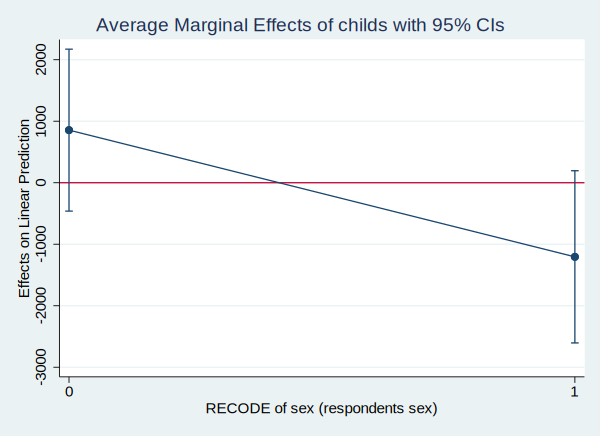

In [5]:
margins, dydx(childs) at(woman=(0 1))
marginsplot, yline(0)

We now get graphically what we calculated manually: The effect of "childs" is positive for people with a 0 on the variable woman (the men) and it is negative for the women. But the effects in themselves are not significantly different from zero. That means that we can be pretty sure that the effect of having more children is different for women than for men, but we can at the same time not be sure that either of the two effects is different from zero! This might be a little bit difficult to grasp.

But what we need to keep in mind is that "not significantly different from zero" not means that it definitely is zero. It is just more than five percent chance that it is zero. But if we look at the graph we can see that the confidence intervals only overlap slightly. In order for the two effects to be the same, the effect for men must be in the lowest part of the interval, at the same time as the effect of women is in the highest part of the interval. THe chance of both those happening at the same time is less than five percent. A bit tricky, but it actually makes sense.

## Difference in the effect of woman for people with different number of kids

Now we will calculate what the difference between men and women is, over different values of the variable childs. We do so by taking the main effect of "woman" (-6100.754), and then add the interaction term (-2060.054) times different values of children.

0 kids: -6100.754 -2060.054 * 0 = -6100.754 <br>
1 kids: -6100.754 -2060.054 * 1 = -8160.808 <br>
2 kids: -6100.754 -2060.054 * 2 = -10220.862 <br>
3 kids: -6100.754 -2060.054 * 3 = -12280.916 <br>
4 kids: -6100.754 -2060.054 * 4 = -14340.97 <br>
5 kids: -6100.754 -2060.054 * 5 = -16401.024 <br>
6 kids: -6100.754 -2060.054 * 6 = -18461.078 <br>
7 kids: -6100.754 -2060.054 * 7 = -20521.132 <br>
8 kids: -6100.754 -2060.054 * 8 = -22581.186 <br>

We thus get nine coefificents, each 2060.054 smaller than the previous. The difference between men and women grow larger for each additional kid there is. Women with 8 kids on average earn 22581.186 less than men with 8 kids!

We can't have 3.5 kids, but we can use the same method for interactions with variables that have decimal values.

Now we will calculate the same coefficients with the margins command, because we then also get the significance values and confidence intervals:



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : 1.woman

1._at        : childs          =           0

2._at        : childs          =           1

3._at        : childs          =           2

4._at        : childs          =           3

5._at        : childs          =           4

6._at        : childs          =           5

7._at        : childs          =           6

8._at        : childs          =           7

9._at        : childs          =           8

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
0.woman      |  (base outcome)
-------------+----------------------------------------------------------------
1.woman      |
         _at |
 

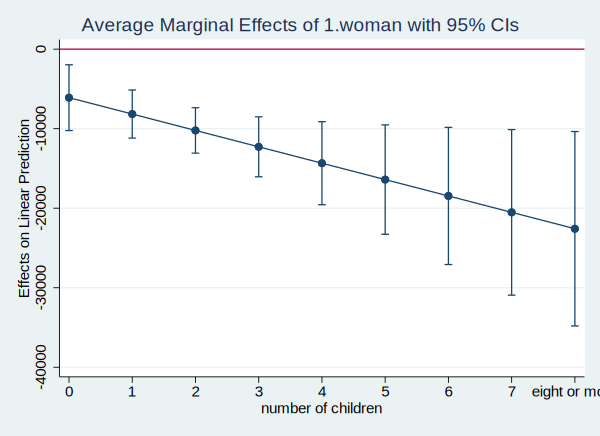

In [6]:
margins, dydx(woman) at(childs=(0/8))
marginsplot, yline(0)

The nine points with confidence intervals thus shows the nine coefficients we just calculated. We can see that the coefficient for woman - that is, the difference between women and men - grows more and more negative as the number of kids increases. All confidence intervals are also different frmo zero, which means that the gender difference always is statistically significant.

The fact that confidence intervals are wider in some places than others have to do with the distribution of values on the childs variable. The regression line is drawn through the center of gravity for the observations, and therefore varies more towards the ends of the data. The intervals are generally smallest where there are the most observations - between 1 and 3 kids. The average of the childs variable in the data is 1.8 kids.

## Predict values

Finally we predict values of the income variable, using the margins command. The easiest way to do so is to show the expected income for women and men at different numbers of kids. But keep in mind that the order of the variables in the at option matters. The variable that is entered first will be on the x axis, and the second will govern the colors. The table is also large, since we now have 18 (9 * 2) coefficients. This table is not generally reported, only the graph.



Predictive margins                              Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : woman           =           0
               childs          =           0

2._at        : woman           =           0
               childs          =           1

3._at        : woman           =           0
               childs          =           2

4._at        : woman           =           0
               childs          =           3

5._at        : woman           =           0
               childs          =           4

6._at        : woman           =           0
               childs          =           5

7._at        : woman           =           0
               childs          =           6

8._at        : woman           =           0
               childs          =           7

9._at        : woman           =           0
               childs          =           8

10._at       : woman           =   

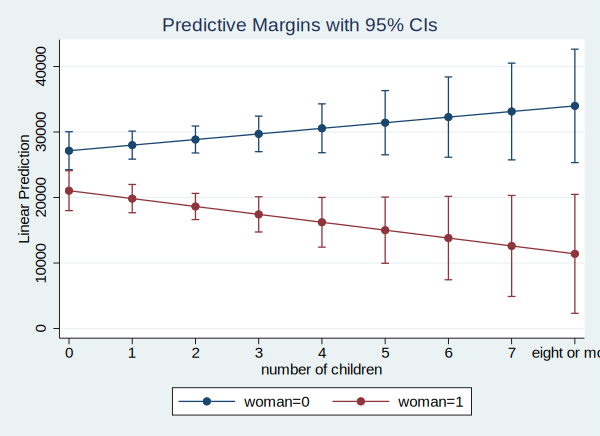

In [7]:
margins, at(childs=(0/8) woman=(0 1))
marginsplot

## Interaction with two continuous variables

Now it is time to take things a step further. What if we have two continuous variables in the interaction? We basically do the same thing, but just have to interpret and present a little bit differently.

Now let's say that we want to look at the relationship between income, age and having another child. It is a bit strange, since the number of kids you have is tightly connecteed with age, but let us still try, for the sake of the exapmle. We then run a regression where we interact the number of kids with age (and write `c.` in front of both variables, since they are both continuous).

In [8]:
reg realrinc woman c.childs##c.age


      Source |       SS           df       MS      Number of obs   =     1,627
-------------+----------------------------------   F(4, 1622)      =     23.32
       Model |  7.5451e+10         4  1.8863e+10   Prob > F        =    0.0000
    Residual |  1.3122e+12     1,622   808984506   R-squared       =    0.0544
-------------+----------------------------------   Adj R-squared   =    0.0520
       Total |  1.3876e+12     1,626   853396969   Root MSE        =     28443

------------------------------------------------------------------------------
    realrinc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
       woman |  -10027.18   1417.245    -7.08   0.000       -12807   -7247.353
      childs |   6347.314   1617.275     3.92   0.000     3175.145    9519.482
         age |   474.4715   69.78933     6.80   0.000     337.5848    611.3583
             |
    c.childs#|
       c.age |  -138

There is a significant interaction effect (-138.2845). Since the term is negative, the interpretation is that the effect of having more kids becomes more negative the older you are. Conversely, the effect of age is more negative the more kids you have.

To for instance calculate the effect of having another another child at different ages we do the following:
20 years old: 6347.314 - 138.2845 * 20 = 3581.624 <br>
30 years old: 6347.314 - 138.2845 * 30 = 2198.779 <br>
40 years old: 6347.314 - 138.2845 * 40 = 815.934 <br>
50 years old: 6347.314 - 138.2845 * 50 = -566.9108 <br>
60 years old: 6347.314 - 138.2845 * 60 = -1949.756 <br>

We can as usual illustrate it with `margins` and `marginsplot`:



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : childs

1._at        : age             =          20

2._at        : age             =          30

3._at        : age             =          40

4._at        : age             =          50

5._at        : age             =          60

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
childs       |
         _at |
          1  |   3581.624   1011.207     3.54   0.000     1598.214    5565.033
          2  |   2198.779   742.7817     2.96   0.003     741.8664    3655.691
          3  |   815.9341   545.9354     1.49   0.135    -254.8787    1886.747
          4  |  -566.9108   511.3732    -1.11   0.268    -1

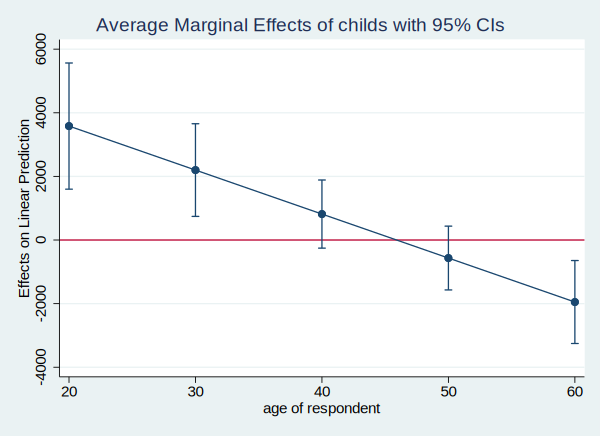

In [10]:
margins, dydx(childs) at(age=(20(10)60))
marginsplot, yline(0)

We can see in the graph that the effect of having kids is positive for people that are 20, 30 and 40, and negative for people that are 50 or 60.

**And to get the effect of getting one year older at different number of kids we do the following:**

0 kids: 474.4715 - 138.2845 * 0 = 474.4715 <br>
2 kids: 474.4715 - 138.2845 * 2 = 197.9026 <br>
4 kids: 474.4715 - 138.2845 * 4 = -78.6664 <br>
6 kids: 474.4715 - 138.2845 * 6 = -355.2354 <br>
8 kids: 474.4715 - 138.2845 * 8 = 631.8044 <br>



Average marginal effects                        Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()
dy/dx w.r.t. : age

1._at        : childs          =           0

2._at        : childs          =           2

3._at        : childs          =           4

4._at        : childs          =           6

5._at        : childs          =           8

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
age          |
         _at |
          1  |   474.4715   69.78933     6.80   0.000     337.5848    611.3583
          2  |   197.9026   56.41555     3.51   0.000     87.24755    308.5576
          3  |  -78.66641   100.8976    -0.78   0.436    -276.5697    119.2369
          4  |  -355.2354    160.821    -2.21   0.027    -670.

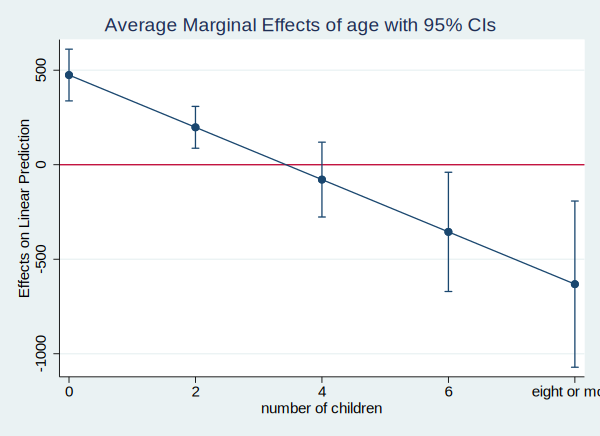

In [13]:
margins, dydx(age) at(childs=(0(2)8))
marginsplot, yline(0)

The effect of age is positive for people with 0 or 2 kids, but negative for people with 4, 6 or 8 kids.

So far we have looked at the effects, but it gets more tricky if we want to show predicted values. Let's say that we want to have age on the x axis. THen we will have to have one line for each number of kids. But in order not to make the graph to overloaded we will just display a few vales, for instance 0, 3 and 6 kids. The other lines would be drawn in between anyway.



Predictive margins                              Number of obs     =      1,627
Model VCE    : OLS

Expression   : Linear prediction, predict()

1._at        : childs          =           0
               age             =          20

2._at        : childs          =           0
               age             =          30

3._at        : childs          =           0
               age             =          40

4._at        : childs          =           0
               age             =          50

5._at        : childs          =           0
               age             =          60

6._at        : childs          =           0
               age             =          70

7._at        : childs          =           3
               age             =          20

8._at        : childs          =           3
               age             =          30

9._at        : childs          =           3
               age             =          40

10._at       : childs          =   

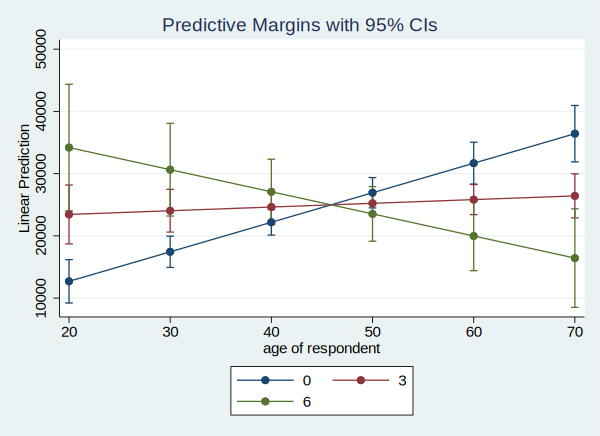

In [12]:
margins, at(age=(20(10)70) childs=(0 3 6))
marginsplot

Here we can see in a different way that the effect of getting older is positive for people with 0 kids, close to zero for people with 3 kids, and negative for people with 6 kids.

But we also have to remember that we now have divided the data into a lot of different subgroups, and we only had about 1600 observations to work with from the beginning. The more interactions we do, the more sensitive is the data to outliers. If there for instance is a person that is very old or have a lot of kids, that person will have a great deal of leverage. It is therefore often better to combine values, so that we for instance compare people with and without kids, or people above or below 40, for instance.

## Conclusion

Interaction analyses are often theoretically interesting, and can show important differences in the data. But remember that the goal seldom is to make a map with the scale 1:1 of reality. Instead, we want to sift through large amounts of data to get to the big patterns. The fact that it is possible to find a significant interaction does not imply that it is interesting. There is always a risk of overfitting, that is, building a model that fits our sample perfectly, but not the wider population.